# Pymaceuticals Inc.
---

### Analysis

- The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84, indicating that there is a strong positive correlation between mouse weight and average tumor volume.
- Ceftamin, Capomulin and Ramicane have no potential outliers in terms of tumor volume.
- Infubinol has one potential outlier in terms of tumor volume.
 

In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results,mouse_metadata,how='left',on=['Mouse ID'])

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [109]:
# Checking the number of mice.
mice_count = len(combined_data_df['Mouse ID'].unique())
mice_count

249

In [110]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df[combined_data_df.duplicated(['Mouse ID','Timepoint'],keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [111]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = 'g989'
duplicate_mice_full = combined_data_df.loc[combined_data_df["Mouse ID"]== g989]
duplicate_mice_full

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [112]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = len(clean_data['Mouse ID'].unique())
mice_count2

249

## Summary Statistics

In [114]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = clean_data.groupby(['Drug Regimen']).mean(numeric_only=True)['Tumor Volume (mm3)']
median_tumor = clean_data.groupby(['Drug Regimen']).median(numeric_only=True)['Tumor Volume (mm3)']
variance_tumor = clean_data.groupby(['Drug Regimen']).var(numeric_only=True)['Tumor Volume (mm3)']
std_tumor = clean_data.groupby(['Drug Regimen']).std(numeric_only=True)['Tumor Volume (mm3)']
sem_tumor = clean_data.groupby(['Drug Regimen']).sem(numeric_only=True)['Tumor Volume (mm3)']
summary_table = pd.DataFrame({'Mean Tumor Volume':mean_tumor,  'Median Tumor Volume': median_tumor,  
                            'Tumor Volume Variance': variance_tumor, 'Tumor Volume Std. Dev.': std_tumor,  
                            'Tumor Volume Std. Err.': sem_tumor })
summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_table_agg = clean_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_table_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

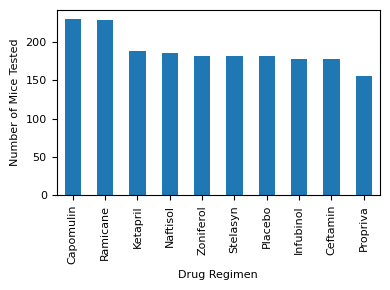

In [116]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = clean_data['Drug Regimen'].value_counts()
counts.plot(kind='bar', figsize=(4,3))
plt.xlabel('Drug Regimen', fontsize=8)
plt.ylabel('Number of Mice Tested',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()



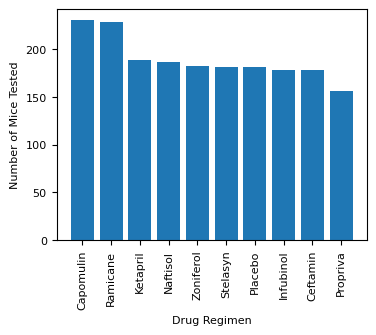

In [117]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
 #data 
drug_regimens = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
timepoints = [230, 228, 188, 186, 182, 181, 181, 178, 178, 156]
# Plot the data as a bar chart
plt.figure(figsize=(4,3))
plt.bar(drug_regimens, timepoints)
plt.xlabel('Drug Regimen',fontsize=8)
plt.ylabel('Number of Mice Tested',fontsize=8)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=8)
plt.show()

<AxesSubplot: ylabel='Sex'>

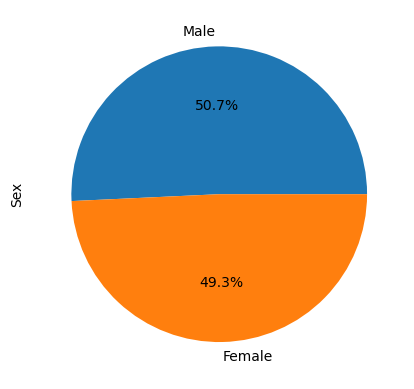

In [118]:

#Group data by sex and count number of male and female
sex_count = clean_data.groupby(['Sex']).count()['Mouse ID'].sort_values(ascending=False)
#Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count.plot.pie(ylabel='Sex',startangle=0,autopct="%1.1f%%")


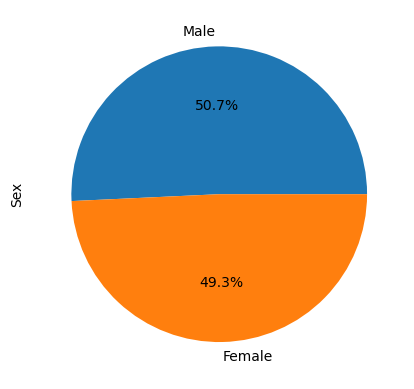

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_data.groupby(['Sex']).count()['Mouse ID'].sort_values(ascending=False)

labels = ['Male','Female']
sizes = [958,930]
plt.pie(sizes,labels=labels,autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
grouped_df = clean_data.groupby(['Mouse ID', 'Drug Regimen'])


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = grouped_df['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data, last_timepoint_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])
filtered_df = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
final_grouped_df = filtered_df.groupby(['Mouse ID', 'Drug Regimen'])
final_tumor_volume = final_grouped_df['Tumor Volume (mm3)'].mean()


In [121]:
# Put treatments into a list
treatments = filtered_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on the drug and get the tumor volumes
    tumor_vol = filtered_df.loc[filtered_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(tumor_vol)
    
    # Determine quartiles
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print any potential outliers
    print(f"{treatment}'s potential outliers:")
    print(tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)])

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


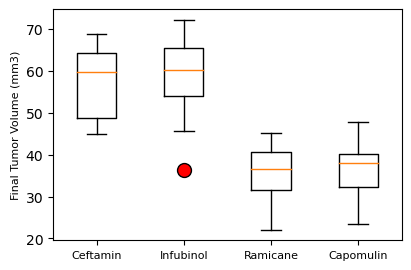

In [122]:
# Generate box plot
fig, ax = plt.subplots(figsize=(4.5,3))
ax.boxplot(tumor_vol_data, labels=treatments,flierprops=dict(markerfacecolor='red',markersize=10))

# Rearrange the order of the treatments
ax.set_xticklabels(treatments, rotation=0, ha='center',fontsize=8)

# Add  labels

ax.set_ylabel('Final Tumor Volume (mm3)',fontsize=8)

# Show plot
plt.show()

## Line and Scatter Plots

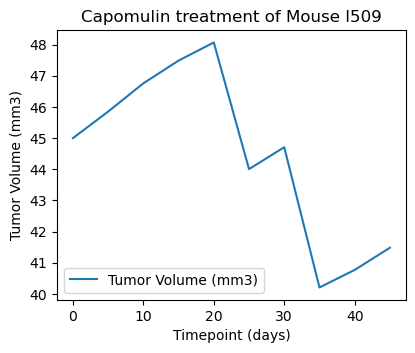

In [123]:
# Subset the dataframe to include only the mouse l509 and the Capomulin regimen
l509_df = clean_data[(clean_data['Mouse ID'] == 'l509') & (clean_data['Drug Regimen'] == 'Capomulin')]

# Create the line plot
l509_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)',figsize=(4.5,3.5))

# Add title and x/y labels
plt.title('Capomulin treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

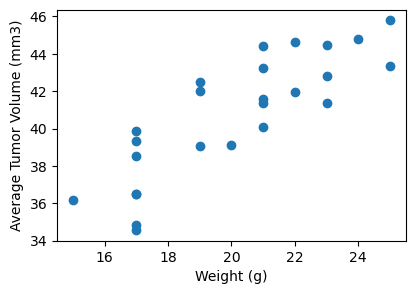

In [124]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter the data to only include rows where the "Drug Regimen" is "Capomulin"
capomulin_data = clean_data[clean_data['Drug Regimen']== 'Capomulin']
# Group the data by mouse ID and calculate the average tumor volume for each mouse
capomulin_avg_vol = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
# Add the mouse weight as a new column in the dataframe
capomulin_avg_vol = pd.merge(capomulin_avg_vol,capomulin_data[["Mouse ID","Weight (g)"]],on="Mouse ID").drop_duplicates()
plt.figure(figsize=(4.5,3))
plt.scatter(capomulin_avg_vol["Weight (g)"], capomulin_avg_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [125]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient
correlation = capomulin_avg_vol["Tumor Volume (mm3)"].corr(capomulin_avg_vol["Weight (g)"])
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {correlation:.2f}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


In [126]:
# Perform linear regression analysis
(slope, intercept, r_value, p_value, std_err) = linregress(capomulin_avg_vol["Weight (g)"], capomulin_avg_vol["Tumor Volume (mm3)"])

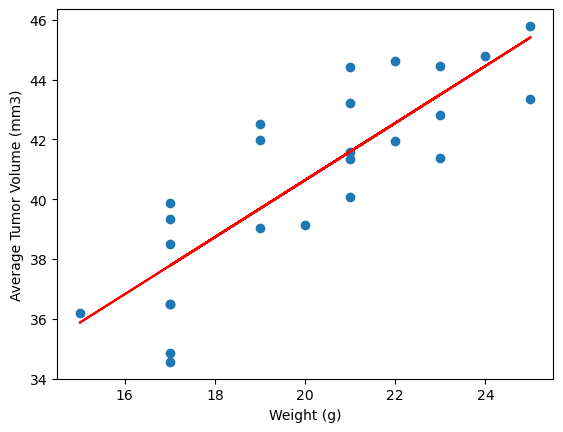

In [127]:
# Plot the data points and the regression line
plt.scatter(capomulin_avg_vol["Weight (g)"], capomulin_avg_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(capomulin_avg_vol["Weight (g)"], intercept+ slope*capomulin_avg_vol["Weight (g)"], 'r')
plt.show()
